# 一起来打怪之 Credit Scoring 练习

-------
## >>>说明：
### 1. 答题步骤：
- 回答问题**请保留每一步**操作过程，请不要仅仅给出最后答案
- 请养成代码注释的好习惯

### 2. 解题思路：
- 为方便大家准确理解题目，在习题实战中有所收获，本文档提供了解题思路提示
- 解题思路**仅供参考**，鼓励原创解题方法
- 为督促同学们自己思考，解题思路内容设置为**注释**，请注意查看

### 3. 所用数据：
- 问题使用了多个数据库，请注意导入每个数据库后都先**查看和了解数据的基本性质**，后面的问题不再一一提醒

--------
## 操作题

### 信用卡欺诈项目

 #### 前期数据导入,预览及处理(此部分勿修改，涉及的数据文件无需复制移动)

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import zipfile
with zipfile.ZipFile('KaggleCredit2.csv.zip', 'r') as z:
    f = z.open('KaggleCredit2.csv')
    data = pd.read_csv(f, index_col=0)
data.head()

In [77]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import zipfile
with zipfile.ZipFile('/Users/richard/Downloads/GiveMeSomeCredit.zip', 'r') as z:
    f = z.open('cs-training.csv')
    data = pd.read_csv(f, index_col=0)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [78]:
# 检查数据维度
data.shape

(150000, 11)

In [79]:
# 查看数据缺失值情况
data.isnull().sum(axis=0)

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [80]:
# 清除缺失值
data.dropna(inplace=True)
data.shape

(120269, 11)

In [82]:
# 取出对应的X和y
y = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)
# 查看平均的欺诈率
y.mean()

0.06948590243537403

### 以下为操作题

#### 1.把数据切分成训练集和测试集

In [107]:
# 提示：查看train_test_split函数
from sklearn.model_selection import train_test_split
import numpy as np

#按照训练集70%，测试集30%进行划分
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,shuffle = True,random_state = 0)

#查看划分后的shape
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((84188, 10), (36081, 10), (84188,), (36081,))

In [108]:
# 通过SeriousDlqin2yrs字段查看正负样本分布情况
# 提示：value_counts
data['SeriousDlqin2yrs'].value_counts()

0    111912
1      8357
Name: SeriousDlqin2yrs, dtype: int64

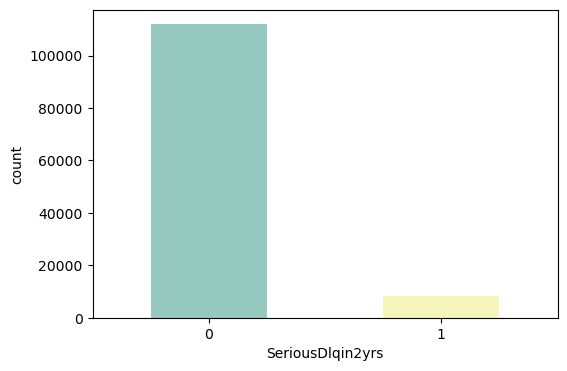

In [109]:
# 绘制两种类别的柱状图
# 提示：dataframe可以直接plot(kind='bar')
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x="SeriousDlqin2yrs", data = data, palette="Set3",width = 0.5)
plt.show()

#### 2.数据预处理之离散化

In [110]:
# 请对年龄按照3岁一个区间进行离散化
# 提示：可以先计算出分桶边界，再基于pandas的cut函数进行离散化(分箱、分桶)
X_train['age'].describe()

count    84188.000000
mean        51.267782
std         14.412245
min          0.000000
25%         41.000000
50%         51.000000
75%         61.000000
max        103.000000
Name: age, dtype: float64

In [111]:
#去除0岁的数据
X_train.drop(X_train[X_train['age'] == 0].index)

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
24972,1.000000,42,0,914.000000,0.0,3,0,1,0,1.0
8531,0.014605,72,0,0.455066,2970.0,12,0,3,0,0.0
11749,0.096331,50,0,0.216251,11666.0,4,0,2,0,2.0
27775,0.046165,59,0,0.274466,5333.0,9,0,2,0,1.0
12822,0.000000,46,0,0.000000,4030.0,4,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
57276,0.012664,75,0,0.311115,6000.0,14,0,1,0,2.0
147112,0.073758,63,1,0.392101,6000.0,15,0,1,0,0.0
53231,0.086033,50,0,0.229226,8375.0,12,0,1,0,1.0
54394,0.361894,42,0,0.507811,4800.0,8,0,2,0,1.0


In [112]:
#进行分桶
X_train['age_type'] = pd.cut(X_train.age, bins=range(21, 106, 3), right=False)
X_train

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,age_type
24972,1.000000,42,0,914.000000,0.0,3,0,1,0,1.0,"[42, 45)"
8531,0.014605,72,0,0.455066,2970.0,12,0,3,0,0.0,"[72, 75)"
11749,0.096331,50,0,0.216251,11666.0,4,0,2,0,2.0,"[48, 51)"
27775,0.046165,59,0,0.274466,5333.0,9,0,2,0,1.0,"[57, 60)"
12822,0.000000,46,0,0.000000,4030.0,4,0,0,0,0.0,"[45, 48)"
...,...,...,...,...,...,...,...,...,...,...,...
57276,0.012664,75,0,0.311115,6000.0,14,0,1,0,2.0,"[75, 78)"
147112,0.073758,63,1,0.392101,6000.0,15,0,1,0,0.0,"[63, 66)"
53231,0.086033,50,0,0.229226,8375.0,12,0,1,0,1.0,"[48, 51)"
54394,0.361894,42,0,0.507811,4800.0,8,0,2,0,1.0,"[42, 45)"


#### 3.数据预处理之独热向量编码

In [113]:
# 请对上述分箱后的年龄段进行独热向量编码
# 提示：使用pandas的get_dummies完成
X_train = pd.get_dummies(X_train,columns = ['age_type'],dtype='float')
X_train = X_train.drop('age', axis=1)
X_train

,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,"age_type_[21, 24)","age_type_[24, 27)","age_type_[27, 30)","age_type_[30, 33)","age_type_[33, 36)","age_type_[36, 39)","age_type_[39, 42)","age_type_[42, 45)","age_type_[45, 48)","age_type_[48, 51)","age_type_[51, 54)","age_type_[54, 57)","age_type_[57, 60)","age_type_[60, 63)","age_type_[63, 66)","age_type_[66, 69)","age_type_[69, 72)","age_type_[72, 75)","age_type_[75, 78)","age_type_[78, 81)","age_type_[81, 84)","age_type_[84, 87)","age_type_[87, 90)","age_type_[90, 93)","age_type_[93, 96)","age_type_[96, 99)","age_type_[99, 102)","age_type_[102, 105)"
24972,1.000000,0,914.000000,0.0,3,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8531,0.014605,0,0.455066,2970.0,12,0,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11749,0.096331,0,0.216251,11666.0,4,0,2,0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27775,0.046165,0,0.274466,5333.0,9,0,2,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12822,0.000000,0,0.000000,4030.0,4,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57276,0.012664,0,0.311115,6000.0,14,0,1,0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
147112,0.073758,1,0.392101,6000.0,15,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53231,0.086033,0,0.229226,8375.0,12,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54394,0.361894,0,0.507811,4800.0,8,0,2,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [114]:
#同步处理一下测试集合
X_test.drop(X_test[X_test['age'] == 0].index)
X_test['age_type'] = pd.cut(X_test.age, bins=range(21, 106, 3), right=False)
X_test = pd.get_dummies(X_test,columns = ['age_type'],dtype='float')
X_test = X_test.drop('age', axis=1)

#### 4.数据预处理之幅度缩放

In [116]:
# 请对连续值特征进行幅度缩放
# 提示：可以使用StandardScaler等幅度缩放器进行处理
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

#查看缩放后的均值和方差
print(X_train_std.mean())
print(X_train_std.std())
print(X_test_std.mean())
print(X_test_std.std())

8.592213982876026e-18
0.9999999999999997
0.0008872489751202581
1.026884807700243


#### 5.使用logistic regression建模，并且输出一下系数，分析重要度。   

In [117]:
# 提示：fit建模，建完模之后可以取出coef属性
from sklearn.linear_model import LogisticRegression
#lr建模
lr = LogisticRegression(C = 100.0**40,random_state = 0,penalty = 'l2',solver = 'sag',max_iter = 10000)
lr.fit(X_train_std,y_train)

LogisticRegression(C=1e+80, max_iter=10000, random_state=0, solver='sag')

In [126]:
#组合列名和重要度
df = pd.DataFrame([X_train.columns,lr.coef_[0]]).T
df.columns = ['Feature','Coef']
#按重要度降序
sorted_df = df.sort_values(by = 'Coef', ascending = False)
sorted_df

,Feature,Coef
1,NumberOfTime30-59DaysPastDueNotWorse,1.729798
5,NumberOfTimes90DaysLate,1.420368
11,"age_type_[27, 30)",0.110581
12,"age_type_[30, 33)",0.106387
13,"age_type_[33, 36)",0.101945
6,NumberRealEstateLoansOrLines,0.095617
10,"age_type_[24, 27)",0.087852
8,NumberOfDependents,0.085102
15,"age_type_[39, 42)",0.080703
14,"age_type_[36, 39)",0.071648


#### 6.使用网格搜索交叉验证进行调参
调整penalty和C参数，其中penalty候选为"l1"和"l2"，C的候选为[1,10,100,500]

In [130]:
# 提示：先按照上面要求准备好网格字典，再使用GridSearchCV进行调参
from sklearn.model_selection import GridSearchCV
#设置参数字典
parameter_dict = {'C': [1, 10, 100, 500],'penalty': ['l1', 'l2']}
#建模，solver = 'sag'不支持L1惩罚项，所以选择liblinear
lr_multi_parameter = GridSearchCV(LogisticRegression(solver = 'liblinear',max_iter = 10000),parameter_dict)
lr_multi_parameter.fit(X_train_std, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=10000, solver='liblinear'),
             param_grid={'C': [1, 10, 100, 500], 'penalty': ['l1', 'l2']})

In [132]:
# 输出最好的超参数
# 输出最好的模型
print(lr_multi_parameter.best_params_)
print(lr_multi_parameter.best_score_)

lr_best = lr_multi_parameter.best_estimator_
lr_best

{'C': 10, 'penalty': 'l2'}
0.9312728650100593


LogisticRegression(C=10, max_iter=10000, solver='liblinear')

#### 7.在测试集上进行预测，计算 查准率/查全率/auc/混淆矩阵/f1值 等测试指标

In [134]:
# 提示：在测试集上预测可以使用predict
# 提示：各种指标可以在sklearn.metrics中查到各种评估指标，分别是accuracy_score、recall_score、auc、confusion_matrix、f1_score
from sklearn import metrics

y_pred = lr_best.predict(X_test_std)
#predict_proba用于计算AUC
y_pred_prob = lr_best.predict_proba(X_test_std)[:,1]

print('Accuracy：', metrics.accuracy_score(y_test, y_pred))
print('Recall：', metrics.recall_score(y_test, y_pred))
print('AUC：', metrics.roc_auc_score(y_test, y_pred_prob))
print('Confusion Matrix：\n', metrics.confusion_matrix(y_test, y_pred))
print('f1_score：', metrics.f1_score(y_test, y_pred))

Accuracy： 0.930905462708905
Recall： 0.03987366758784051
AUC： 0.69429637642073
Confusion Matrix：
 [[33487    61]
 [ 2432   101]]
f1_score： 0.07495361781076067


#### 8.更多优化
银行通常会有更严格的要求，因为欺诈带来的后果通常比较严重，一般我们会调整模型的标准。   

比如在logistic regression当中，一般我们的概率判定边界为0.5，但是我们可以把阈值设定低一些，来提高模型的“敏感度”   
试试看把阈值设定为0.3，再看看这个时候的混淆矩阵等评估指标。

In [156]:
# 提示：thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# 根据predict_proba的结果和threshold的比较确定结果，再评估各种结果指标
from sklearn.preprocessing import binarize

for thresholds in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    y_pred_class = binarize(y_pred_prob.reshape(-1, 1), threshold = thresholds).reshape(-1, 1)
    print('threshold =',thresholds,end = '\n')
    print('accuracy_score:',metrics.accuracy_score(y_test, y_pred_class),end = '\n')
    print('recall_score:',metrics.recall_score(y_test, y_pred_class),end = '\n')
    print('confusionmatrix:\n',metrics.confusion_matrix(y_test, y_pred_class),end = '\n \n')

threshold = 0.1
accuracy_score: 0.8612843324741554
recall_score: 0.41571259376233716
confusionmatrix:
 [[30023  3525]
 [ 1480  1053]]
 
threshold = 0.2
accuracy_score: 0.9269144425043652
recall_score: 0.1721279115673115
confusionmatrix:
 [[33008   540]
 [ 2097   436]]
 
threshold = 0.3
accuracy_score: 0.9305174468556858
recall_score: 0.094749309119621
confusionmatrix:
 [[33334   214]
 [ 2293   240]]
 
threshold = 0.4
accuracy_score: 0.9308223164546438
recall_score: 0.0548756415317805
confusionmatrix:
 [[33446   102]
 [ 2394   139]]
 
threshold = 0.5
accuracy_score: 0.930905462708905
recall_score: 0.03987366758784051
confusionmatrix:
 [[33487    61]
 [ 2432   101]]
 
threshold = 0.6
accuracy_score: 0.9301848618386408
recall_score: 0.02329253849190683
confusionmatrix:
 [[33503    45]
 [ 2474    59]]
 
threshold = 0.7
accuracy_score: 0.9297414151492476
recall_score: 0.013422818791946308
confusionmatrix:
 [[33512    36]
 [ 2499    34]]
 
threshold = 0.8
accuracy_score: 0.9296305534768992
r

#### 9.尝试对不同特征的重要度进行排序，通过特征选择的方式，对特征进行筛选。并重新建模，观察此时的模型准确率等评估指标。

In [159]:
# 可以根据逻辑回归的系数绝对值大小进行排序，也可以基于树模型的特征重要度进行排序
# 特征选择可以使用RFE或者selectFromModel

from sklearn.ensemble import ExtraTreesClassifier
#探索特征对模型分类重要程度
model = ExtraTreesClassifier()
model.fit(X_train_std,y_train)

ser1 = pd.Series(X_train.columns)
ser2 = pd.Series(model.feature_importances_)
importance = pd.concat([ser1,ser2],axis = 1)
importance.columns = ['Col_name','Importance']
print(importance)

                                Col_name    Importance
0   RevolvingUtilizationOfUnsecuredLines  1.778699e-01
1   NumberOfTime30-59DaysPastDueNotWorse  7.321572e-02
2                              DebtRatio  1.733921e-01
3                          MonthlyIncome  1.709589e-01
4        NumberOfOpenCreditLinesAndLoans  1.179680e-01
5                NumberOfTimes90DaysLate  9.052146e-02
6           NumberRealEstateLoansOrLines  4.897019e-02
7   NumberOfTime60-89DaysPastDueNotWorse  5.584899e-02
8                     NumberOfDependents  5.066611e-02
9                      age_type_[21, 24)  8.553141e-04
10                     age_type_[24, 27)  1.460624e-03
11                     age_type_[27, 30)  1.807487e-03
12                     age_type_[30, 33)  1.893239e-03
13                     age_type_[33, 36)  1.933608e-03
14                     age_type_[36, 39)  2.570908e-03
15                     age_type_[39, 42)  2.444215e-03
16                     age_type_[42, 45)  3.098698e-03
17        

#### 10.其他模型算法尝试
使用RandomForestClassifier/SVM/KNN等sklearn分类算法进行分类，尝试上述超参数调优算法过程。

### 随机森林

In [162]:
from sklearn.ensemble import RandomForestClassifier

#n_estimators使用默认值100
forest = RandomForestClassifier(criterion = 'entropy',n_estimators = 100,random_state = 0)
forest.fit(X_train_std, y_train)

y_pred = forest.predict(X_test_std)
#评估结果
print('accuracy_score:',metrics.accuracy_score(y_test, y_pred),end = '\n')
print('recall_score:',metrics.recall_score(y_test, y_pred),end = '\n')

accuracy_score: 0.9329009728111749
recall_score: 0.15633636004737467


In [166]:
#设置参数字典，每个参数选取了几个可能的值
parameter_forest = {'n_estimators': [10,50,100],'max_depth': [3,5,10]}

forest_multiparameter = GridSearchCV(RandomForestClassifier(criterion = 'entropy',random_state = 0),parameter_forest)
forest_multiparameter.fit(X_train_std, y_train)

GridSearchCV(estimator=RandomForestClassifier(criterion='entropy',
                                              random_state=0),
             param_grid={'max_depth': [3, 5, 10],
                         'n_estimators': [10, 50, 100]})

In [167]:
# 输出最好的超参数
# 输出最好的模型
print(forest_multiparameter.best_params_)
print(forest_multiparameter.best_score_)

forest_best = forest_multiparameter.best_estimator_
forest_best

{'max_depth': 10, 'n_estimators': 100}
0.9338979454655686


RandomForestClassifier(criterion='entropy', max_depth=10, random_state=0)

### 支持向量机

In [172]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=0, gamma=0.10, C=1.0,max_iter = 100000)
svm.fit(X_train_std, y_train)

y_pred = svm.predict(X_test_std)
#评估结果
print('accuracy_score:',metrics.accuracy_score(y_test, y_pred),end = '\n')
print('recall_score:',metrics.recall_score(y_test, y_pred),end = '\n')

/Users/richard/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy_score: 0.9303788697652504
recall_score: 0.013422818791946308


### K最近邻

In [163]:
from sklearn.neighbors import KNeighborsClassifier

#临近点的个数设为5，距离采用默认的欧式距离
knn = KNeighborsClassifier(n_neighbors = 5, p = 2, metric = 'minkowski')
knn.fit(X_train_std, y_train)

y_pred = knn.predict(X_test_std)
#评估结果
print('accuracy_score:',metrics.accuracy_score(y_test, y_pred),end = '\n')
print('recall_score:',metrics.recall_score(y_test, y_pred),end = '\n')

accuracy_score: 0.9292702530417671
recall_score: 0.09080142123963679


In [168]:
#设置参数字典，每个参数选取了几个可能的值
parameter_knn = {'n_neighbors': [5,10,15,20],'weights': ['uniform','distance']}

knn_multiparameter = GridSearchCV(KNeighborsClassifier(p = 2, metric = 'minkowski'),parameter_knn)
knn_multiparameter.fit(X_train_std, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 10, 15, 20],
                         'weights': ['uniform', 'distance']})

In [169]:
# 输出最好的超参数
# 输出最好的模型
print(knn_multiparameter.best_params_)
print(knn_multiparameter.best_score_)

knn_best = knn_multiparameter.best_estimator_
knn_best

{'n_neighbors': 15, 'weights': 'uniform'}
0.9315816987517869


KNeighborsClassifier(n_neighbors=15)